In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [237]:
loc = 'datasets'

lines       = pd.read_csv('{}/london.lines.csv'.format(loc), index_col=0)
stations    = pd.read_csv('{}/london.stations.csv'.format(loc), index_col=0)
connections = pd.read_csv('{}/london.connections.csv'.format(loc))

In [238]:
connections.head()

#stations['name'][145]

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2


In [42]:
baker_streets = connections.loc[connections['station1'] == 11]

print(list(baker_streets['station2']))

stations.loc[stations['name'].isin(list(baker_streets['station2']))]

[163, 212, 83, 104, 83, 104, 28, 249, 94, 104]


,latitude,longitude,name,display_name,zone,total_lines,rail
id,,,,,,,


In [197]:
#stations.loc[connections.loc[connections['station2']]['name'] == 11]

In [198]:
# for connection_id, connection in connections.iterrows():
#     station1_name = stations.ix[connection['station1']]['name']
#     station2_name = stations.ix[connection['station2']]['name']
#     #graph.add_edge(station1_name, station2_name, time = connection['time'])
    
# #add the connection between Bank and Monument manually
# graph.add_edge('Bank', 'Monument', time = 1)

In [159]:
for connection_id, connection in connections.iterrows():
    if stations.loc[connection['station1']]['name'] == "King's Cross St. Pancras":
        print (connection['station1'])
        
for connection_id, connection in connections.iterrows():
    if connection['station1'] == 145:
        print (stations.loc[connection['station1']]['name'])

145
King's Cross St. Pancras


In [266]:
test = 144
occurs = 0

stat_no = len(stations)+1

adj_mat = np.zeros((stat_no, stat_no))

for connection_id, connection in connections.iterrows():
#    print (connection_id)
    adj_mat[connection['station1']-1][connection['station2']-1] = 1
    adj_mat[connection['station2']-1][connection['station1']-1] = 1
    if [connection['station1'] - 1] == test  or [connection['station2'] - 1] == test:
        occurs +=1
        
print(occurs)

sums = [sum(rowi) for rowi in adj_mat]
        
sums[144]

0


7.0

In [149]:
sums = []

for i in adj_mat:
    sums.append(sum(i))

print(sum(sums))
print(len(connections))

350.0
406


In [200]:
connect_mat = adj_mat
print(stat_no)

303


In [206]:

start = 10
exits = []

for i in range(1000000): 

    next_loc = start


    while next_loc != 'exit':

        location = int(next_loc)
        paths = np.append(np.nonzero(connect_mat[location])[0], 'exit')

        next_loc = np.random.choice(paths)

    exits.append(location)


exits

[253,
 211,
 196,
 103,
 93,
 211,
 192,
 211,
 146,
 248,
 282,
 10,
 82,
 82,
 89,
 81,
 217,
 82,
 253,
 81,
 158,
 82,
 82,
 10,
 281,
 103,
 191,
 89,
 248,
 211,
 93,
 82,
 248,
 27,
 10,
 89,
 248,
 103,
 162,
 211,
 106,
 93,
 253,
 10,
 253,
 253,
 10,
 162,
 162,
 162,
 162,
 162,
 192,
 10,
 89,
 211,
 201,
 248,
 10,
 81,
 81,
 158,
 162,
 81,
 81,
 17,
 162,
 27,
 211,
 207,
 289,
 253,
 106,
 192,
 10,
 10,
 27,
 101,
 162,
 289,
 81,
 284,
 248,
 70,
 82,
 10,
 103,
 277,
 10,
 10,
 81,
 217,
 10,
 171,
 248,
 10,
 101,
 158,
 46,
 226,
 10,
 103,
 171,
 10,
 81,
 93,
 106,
 253,
 248,
 211,
 228,
 103,
 206,
 191,
 201,
 162,
 248,
 10,
 207,
 10,
 10,
 211,
 106,
 211,
 271,
 162,
 191,
 161,
 10,
 192,
 162,
 242,
 93,
 253,
 161,
 161,
 103,
 211,
 10,
 282,
 248,
 217,
 248,
 248,
 10,
 10,
 162,
 248,
 162,
 10,
 27,
 253,
 253,
 81,
 81,
 248,
 93,
 103,
 162,
 82,
 82,
 162,
 27,
 10,
 93,
 196,
 27,
 162,
 93,
 217,
 253,
 103,
 10,
 93,
 232,
 248,
 82,
 122,
 

In [254]:
#exits.count(10)
to_plot = {stations.loc[elem+1]['name']:exits.count(elem) for elem in range(stat_no-1) if exits.count(elem)}
to_plot
#plot_sorted = {arr[0]:arr[1] for arr in sorted(to_plot.items(), key=operator.itemgetter(1))}
#plot_sorted
#[elem for elem in range(stat_no) if exits.count(elem)]

#[val if val for val in range(20) if val % 3]
#plt.bar([exits.count(elem) for elem in range(stat_no)], range(stat_no))
#plt.gca().set_yscale("log")

{'Acton Town': 4,
 'Aldgate': 46,
 'Aldgate East': 43,
 'Angel': 1706,
 'Archway': 46,
 'Arnos Grove': 9,
 'Arsenal': 410,
 'Baker Street': 179936,
 'Balham': 4,
 'Bank': 314,
 'Barbican': 705,
 'Barons Court': 91,
 'Bayswater': 7420,
 'Belsize Park': 130,
 'Bermondsey': 62,
 'Bethnal Green': 52,
 'Blackfriars': 240,
 'Blackhorse Road': 27,
 'Bond Street': 46133,
 'Borough': 98,
 'Bounds Green': 10,
 'Bow Church': 1,
 'Bow Road': 4,
 'Brent Cross': 7,
 'Brixton': 84,
 'Burnt Oak': 1,
 'Caledonian Road': 1774,
 'Camden Town': 888,
 'Canada Water': 16,
 'Cannon Street': 37,
 'Canons Park': 853,
 'Chalk Farm': 378,
 'Chancery Lane': 916,
 'Charing Cross': 3518,
 'Chiswick Park': 3,
 'Clapham Common': 23,
 'Clapham North': 70,
 'Clapham South': 9,
 'Colindale': 4,
 'Covent Garden': 2202,
 'Croxley': 3,
 'Dollis Hill': 2969,
 'Ealing Broadway': 3,
 'Ealing Common': 1,
 "Earl's Court": 247,
 'East Acton': 53,
 'East Finchley': 7,
 'East Putney': 2,
 'Eastcote': 25,
 'Edgware Road (B)': 29926

In [264]:
plot_sorted1 = sorted(to_plot.items(), key=operator.itemgetter(1))

plot_sorted = {arr[0]:arr[1] for arr in plot_sorted1}

plot_sorted

{'Acton Town': 4,
 'Aldgate': 46,
 'Aldgate East': 43,
 'Angel': 1706,
 'Archway': 46,
 'Arnos Grove': 9,
 'Arsenal': 410,
 'Baker Street': 179936,
 'Balham': 4,
 'Bank': 314,
 'Barbican': 705,
 'Barons Court': 91,
 'Bayswater': 7420,
 'Belsize Park': 130,
 'Bermondsey': 62,
 'Bethnal Green': 52,
 'Blackfriars': 240,
 'Blackhorse Road': 27,
 'Bond Street': 46133,
 'Borough': 98,
 'Bounds Green': 10,
 'Bow Church': 1,
 'Bow Road': 4,
 'Brent Cross': 7,
 'Brixton': 84,
 'Burnt Oak': 1,
 'Caledonian Road': 1774,
 'Camden Town': 888,
 'Canada Water': 16,
 'Cannon Street': 37,
 'Canons Park': 853,
 'Chalk Farm': 378,
 'Chancery Lane': 916,
 'Charing Cross': 3518,
 'Chiswick Park': 3,
 'Clapham Common': 23,
 'Clapham North': 70,
 'Clapham South': 9,
 'Colindale': 4,
 'Covent Garden': 2202,
 'Croxley': 3,
 'Dollis Hill': 2969,
 'Ealing Broadway': 3,
 'Ealing Common': 1,
 "Earl's Court": 247,
 'East Acton': 53,
 'East Finchley': 7,
 'East Putney': 2,
 'Eastcote': 25,
 'Edgware Road (B)': 29926

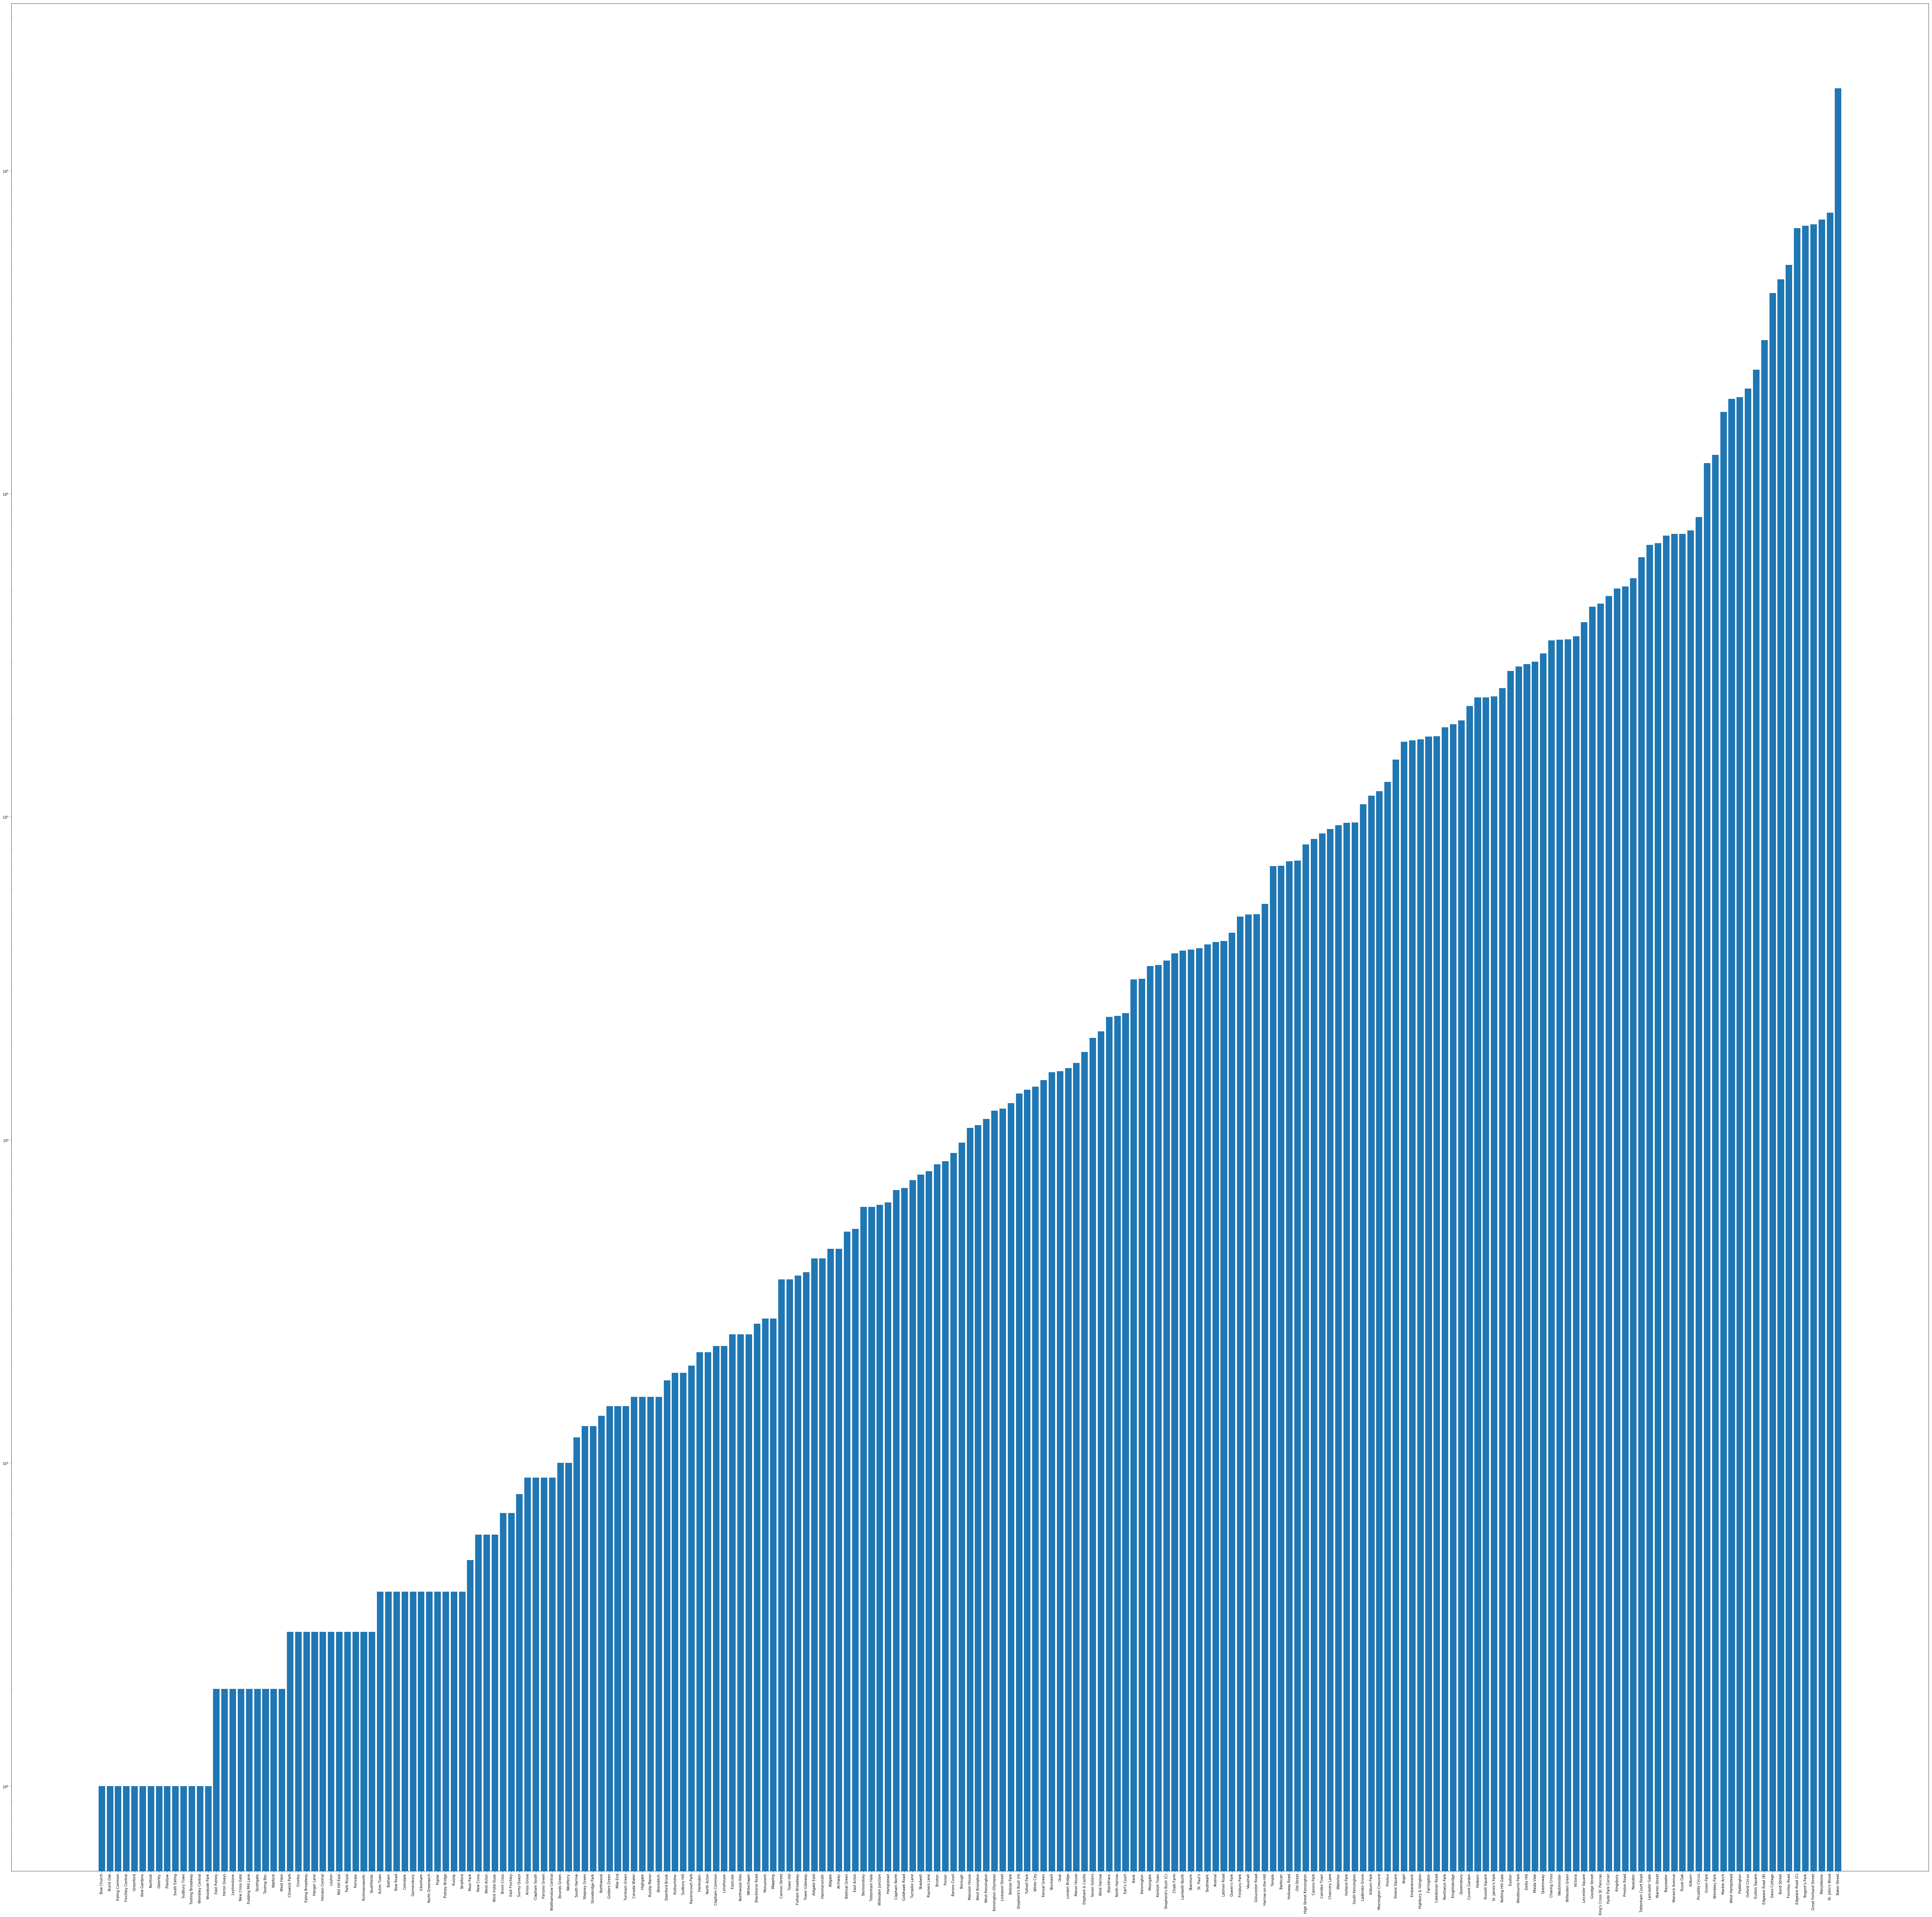

In [263]:
D = plot_sorted

fig, ax = plt.subplots(figsize=(100,100))

ax.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
ax.set_yscale("log")

plt.savefig('first diffusion plots.png', dpi=100)

In [84]:
indeces = np.sort(stations.index.values)

for i in range(1, len(indeces)):
    print (i, end='')
    if indeces[i-1] != (indeces[i] - 1):
        print('ERRRRRORRRROR')
    
print('Done')
    

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188ERRRRRORRRROR
189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301Done


In [97]:
x = stations.loc(187)

#stations.ix[189]['name']

In [133]:
a = np.zeros((3, 2))

x = 4

a[0][0] = list(x)

a

TypeError: 'int' object is not iterable

In [108]:
for i in [1, 2]:
    if not a[1][1]:
        a[1][1]
     

In [158]:
stations.index[145]

166

In [218]:
[val if val % 2 else -val for val in range(20) if val % 3]

[1, -2, -4, 5, 7, -8, -10, 11, 13, -14, -16, 17, 19]

In [121]:
bool([])

False

In [130]:
b = 4
c = [b]
c.append(6)

In [152]:
x = 0

In [151]:
stations.loc[stations[''] == "King's Cross St. Pancras"]

KeyError: ''

In [153]:
for connection_id, connection in connections.iterrows():
    station1_name = stations.loc[connection['station1']]['name']
    #if station1_name[1:6:] == list('Edgware'):
    print (station1_name)

Baker Street
Baker Street
Charing Cross
Charing Cross
Edgware Road (B)
Edgware Road (B)
Elephant & Castle
Embankment
Harlesden
Harlesden
Harrow & Wealdston
Kensal Green
Kensal Green
Kenton
Kilburn Park
Kilburn Park
Lambeth North
Maida Vale
North Wembley
North Wembley
Oxford Circus
Oxford Circus
Paddington
Stonebridge Park
Bank
Bank
Barkingside
Barkingside
Bethnal Green
Bethnal Green
Bond Street
Bond Street
Buckhurst Hill
Buckhurst Hill
Chancery Lane
Chancery Lane
Chigwell
Chigwell
Debden
Debden
Ealing Broadway
East Acton
East Acton
Epping
Fairlop
Gants Hill
Gants Hill
Grange Hill
Greenford
Greenford
Hanger Lane
Hanger Lane
Holborn
Holland Park
Holland Park
Lancaster Gate
Lancaster Gate
Leyton
Leyton
Leytonstone
Leytonstone
Mile End
Northolt
North Acton
Notting Hill Gate
Oxford Circus
Redbridge
Roding Valley
Ruislip Gardens
Ruislip Gardens
Shepherd's Bush (C)
Snaresbrook
South Woodford
Aldgate
Aldgate
Baker Street
Baker Street
Barbican
Barbican
Bayswater
Bayswater
Blackfriars
Blackfriar

In [239]:
import operator
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [247]:
x_meh = {arr[0]:arr[1] for arr in sorted(x.items(), key=operator.itemgetter(1))}
x_meh1 = {arr[0]:arr[1] for arr in sorted_x}

print(x_meh)
print(x_meh1)

{0: 0, 2: 1, 1: 2, 4: 3, 3: 4}
{0: 0, 2: 1, 1: 2, 4: 3, 3: 4}


In [243]:
x

{0: 0, 1: 2, 2: 1, 3: 4, 4: 3}